# Introduction
- The term loan refers to a type of credit vehicle in which a sum of money is lent to another party in exchange for future repayment of the value or principal amount. In many - cases, the lender also adds interest or finance charges to the principal value, which the borrower must repay in addition to the principal balance


# **Problem Statement**

The dataset used for this problem is [Loan Prediction Problem Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset). Each Applicant is attributed with the following columns in this data set and are as follows:

| Column | Description |
| ----------- | ----------- |
| Loan_ID | Unique Loan ID |
| Gender | Male/Female |
| Married | Whether Married : Yes/No |
| Dependents | No. of people depending on the Applicant |
| Education | Graduate/Undergraduate |
| Self_Employment | Whether Self_Employment : Yes/No |
| ApplicantIncome | Applicant Income |
| CoapplicantIncome | Co-Applicant Income |
| LoanAmount | Loan Amount (in thousands) |
| Loan_Amount_Term | Loan Duration |
| Credit_History | Credit History of the Applicant |
| Property_Area | Urban/Semiurban/Rural |
| Loan_Status | Whether Loan Approved: Yes/No |

**The dimensions of the dataset is 614*13**

# Import library

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn import preprocessing

#Data Splitting
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Import_Dataset

In [5]:
train_path = pd.read_csv("c:/Users/hp/Downloads/train_u6lujuX_CVtuZ9i.csv")
df = train_path
df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 13)

# Check_Missing_values

In [8]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
(df.isnull().sum()/df.shape[0]*100)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100)

np.float64(1.8667000751691305)

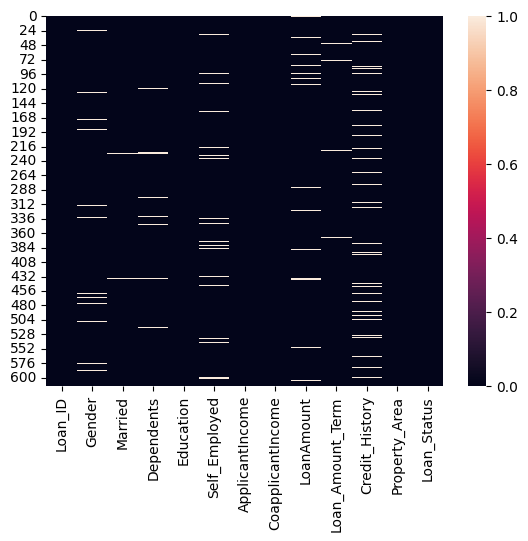

In [18]:
sns.heatmap(df.isnull())
plt.show()

# Handling_Missing_Values
-- Part 1

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Deleting_Data
#### 1. drop columns -> thats missing values are greater than 50%
####  2. drop rows -> drop a single rows 

In [21]:
# for columns 
df.drop(columns=['Self_Employed'],inplace=True) 

# for rows 
df.dropna(inplace=True)

In [23]:
df.shape

(505, 12)

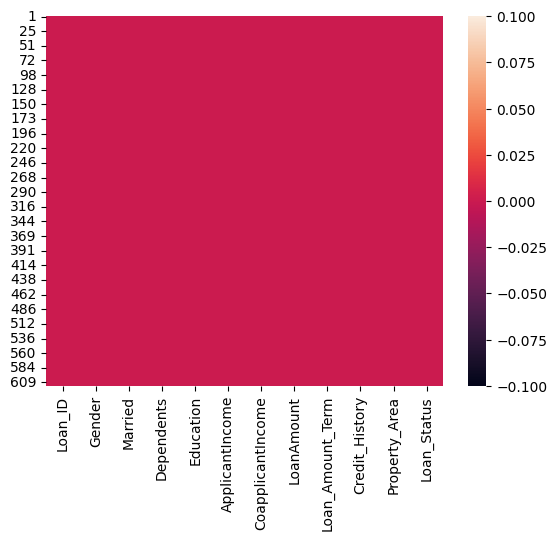

In [26]:
sns.heatmap(df.isnull())
plt.show()

- after drop data we lose more data 

# Handling_Missing_Values
  -  Part 2

In [28]:
train_path = pd.read_csv("c:/Users/hp/Downloads/train_u6lujuX_CVtuZ9i.csv")
df = train_path


In [30]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Backfill and frowardfiiling 

In [ ]:
df.fillna(method="ffill",axis=1)
df.fillna(method="bfill",axis=1)

In [34]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [36]:
df.select_dtypes(include="object").isnull().sum()

Loan_ID           0
Gender            0
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

# Use loop function

# Fill_Categorical_data

In [40]:
for i in df.select_dtypes(include="object").columns:
    df[i].fillna(df[i].mode()[0],inplace=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_13168\79449066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [56]:
train_path ['LoanAmount'] = train_path ['LoanAmount'].fillna(train_path['LoanAmount'].mean())
train_path ['Loan_Amount_Term'] = train_path ['Loan_Amount_Term'].fillna(train_path['Loan_Amount_Term'].mean())
train_path ['Credit_History'] = train_path ['Credit_History'].fillna(train_path['Credit_History'].mean())

In [57]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Use SimpleImputer to fillna

In [44]:
df.select_dtypes(include="Float64").columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [54]:
from sklearn.impute import SimpleImputer



In [55]:
si = SimpleImputer(strategy="mean")
arr = si.fit_transform(df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History']])

<Axes: >

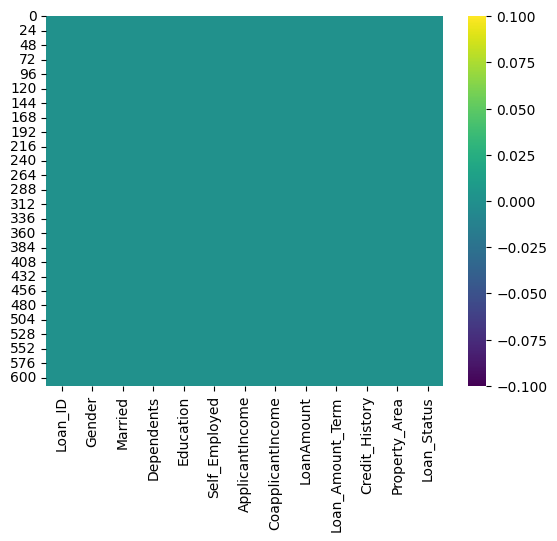

In [61]:
sns.heatmap(df.isnull(),cmap='viridis')

# One_Hot_Encoding

In [62]:
enc_data= df[["Gender", "Married"]]

In [63]:
pd.get_dummies(enc_data)

,Gender_Female,Gender_Male,Married_No,Married_Yes
0,False,True,True,False
1,False,True,False,True
2,False,True,False,True
3,False,True,False,True
4,False,True,True,False
...,...,...,...,...
609,True,False,True,False
610,False,True,False,True
611,False,True,False,True
612,False,True,False,True


In [68]:
pd.get_dummies(enc_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [64]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
oh = OneHotEncoder(drop="first")
ar = oh.fit_transform(enc_data).toarray()
ar

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]], shape=(614, 2))

In [74]:
pd.DataFrame(ar,columns=["Gender_Male", "Married_Yes"])

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


# Label_Encoding
 - perforn on nominal data 

In [75]:
df1 = pd.DataFrame({"name": ["Comsats","cow","cat","dog","black"]})
df1

,name
0,Comsats
1,cow
2,cat
3,dog
4,black


In [76]:
from sklearn.preprocessing import LabelEncoder


In [81]:
le = LabelEncoder()
df1["en_name"] = le.fit_transform(df1["name"])
df1

,name,en_name
0,Comsats,0
1,cow,3
2,cat,2
3,dog,4
4,black,1


In [89]:
la = LabelEncoder()
la.fit(df["Property_Area"])


LabelEncoder()

In [87]:
la = LabelEncoder()
la.fit_transform(df["Property_Area"])


array([2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,

# Ordinal_Encoding 

In [90]:
df2 = pd.DataFrame({"size":["s","m","l","xl","s","m","l","xl","m"]})

In [91]:
ord_data = [["s","m","l","xl"]]

In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [93]:
oe = OrdinalEncoder(categories=ord_data)
oe.fit(df2[['size']])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl']])

# Outliers

In [94]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: xlabel='CoapplicantIncome'>

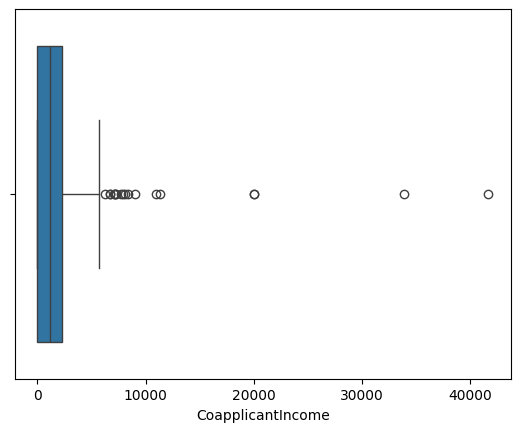

In [95]:
sns.boxplot(x = "CoapplicantIncome",data=df)

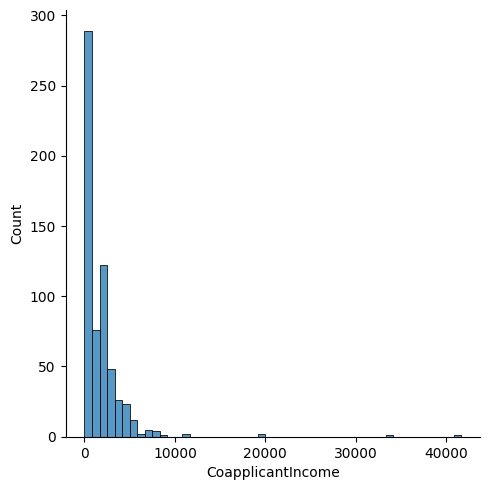

In [97]:
sns.displot(x="CoapplicantIncome",data=df)
plt.show()

In [98]:
z_score = (df["CoapplicantIncome"] - df["CoapplicantIncome"].mean())/(df["CoapplicantIncome"].std())

In [104]:
df['z_score'] = z_score

In [107]:
df[df["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,-0.554036


# Feature_Scaling
- 1.standarization
- 2.Normalization

In [110]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,z_score
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,4.628943e-17
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,1.000000e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,-5.540356e-01
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,-5.540356e-01
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,-1.478842e-01
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.310140e-01
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.368502e+01


In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
ss = StandardScaler()
ss.fit(df[["ApplicantIncome"]])

StandardScaler()

- data nature reamain same in feature  scalling 

# `Handle_Duplication_Data`

In [117]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,-0.554036


In [118]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [119]:
df.drop_duplicates(inplace=True)

In [120]:
df.shape

(614, 14)

# `Exploratory Data Analysis `

C:\Users\hp\AppData\Local\Temp\ipykernel_13168\193395095.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.index, y=y.values, palette=colors).set_title(col)
C:\Users\hp\AppData\Local\Temp\ipykernel_13168\193395095.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.index, y=y.values, palette=colors).set_title(col)
C:\Users\hp\AppData\Local\Temp\ipykernel_13168\193395095.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.index, y=y.values, palette=colors).set_title(col)
C:\Users\hp\AppData\Local\Temp\ipykernel_13168\19339509

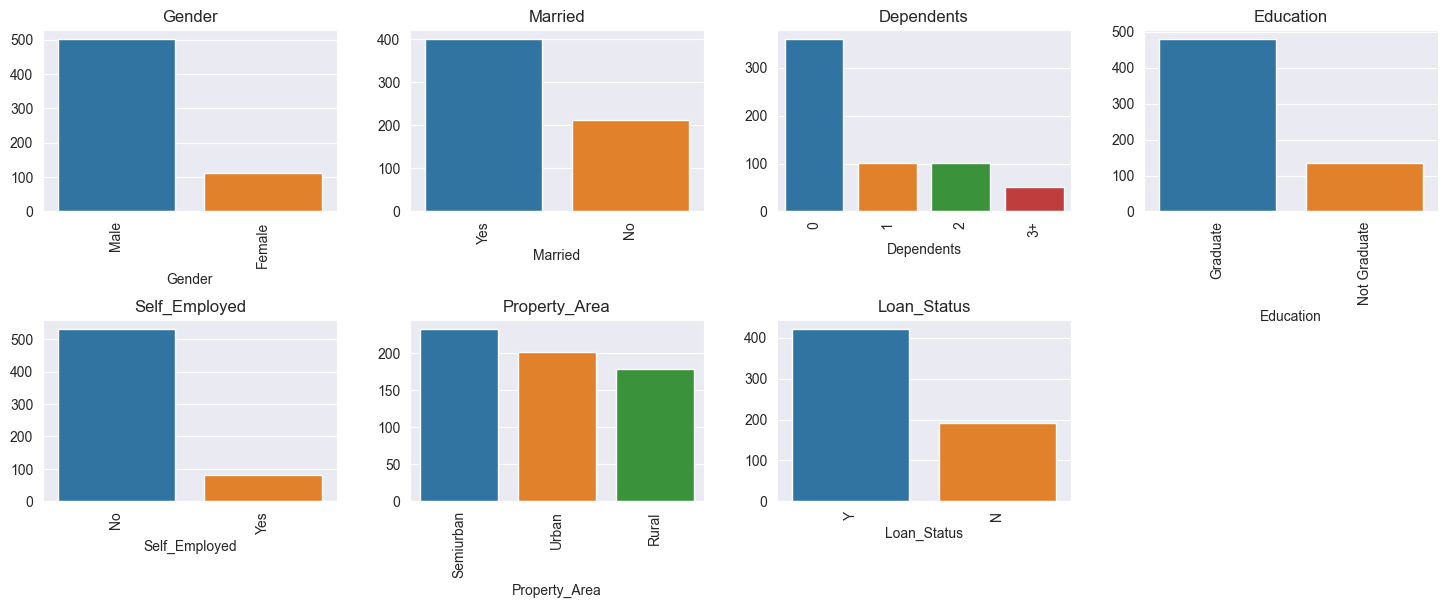

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and palette
sns.set_style('darkgrid')
palette = sns.color_palette('tab10')  # 10 distinct colors

# Select object (categorical) columns, excluding 'Loan_ID'
object_cols = train_path.select_dtypes(include='object').columns
object_cols = [col for col in object_cols if col != 'Loan_ID']

plt.figure(figsize=(18, 40))
index = 1

for col in object_cols:
    y = train_path[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.6, wspace=0.25)
    
    # Assign different colors to each category
    colors = palette[:len(y)]  # use as many colors as categories
    sns.barplot(x=y.index, y=y.values, palette=colors).set_title(col)
    
    index += 1

plt.show()


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

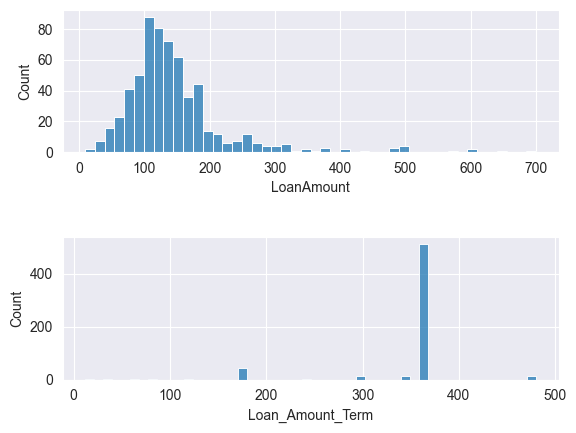

In [125]:
plt.figure(figsize=(6,20))

fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(df['LoanAmount'], ax=axes[0,0])
plt.subplots_adjust(hspace=0.6)
sns.histplot(df['Loan_Amount_Term'], ax=axes[1,0])

[Text(0.5, 1.0, 'Loan_Status based on Married')]

<Figure size 1000x400 with 0 Axes>

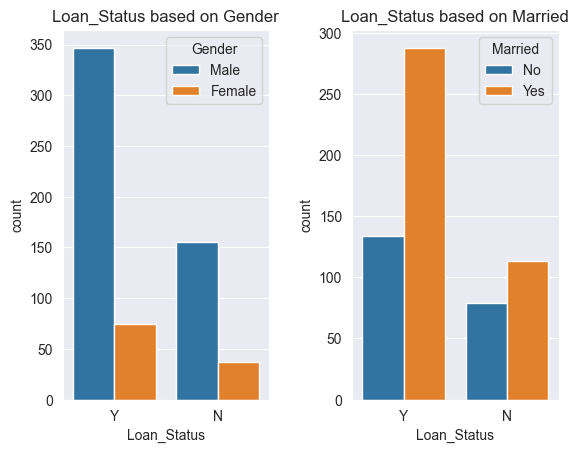

In [127]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Gender',data=df).set(title="Loan_Status based on Gender")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Married',data=df).set(title="Loan_Status based on Married")

[Text(0.5, 1.0, 'Loan_Status based on Self_Employed')]

<Figure size 1000x400 with 0 Axes>

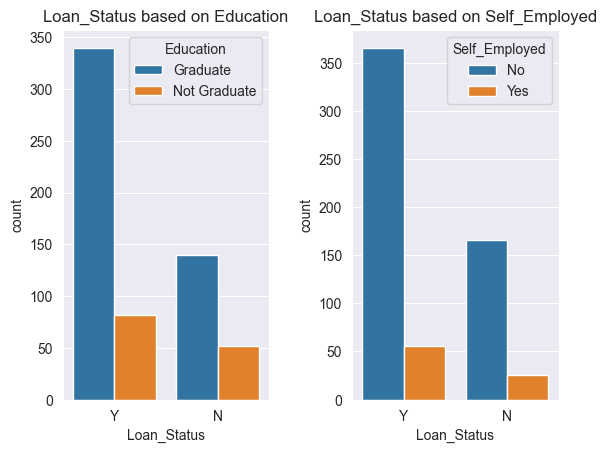

In [128]:
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x='Loan_Status',hue='Education',data=df).set(title="Loan_Status based on Education")
plt.subplots_adjust(wspace=0.4)
sns.countplot(ax=axes[0,1],x='Loan_Status',hue='Self_Employed',data=df).set(title="Loan_Status based on Self_Employed")